# importing necessary libraries

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# get data

In [106]:
wine=pd.read_csv("wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [107]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [108]:
wine.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [109]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [110]:
Wine=wine.values
Wine

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

# Normalising the data

In [111]:
norm_wine=pd.DataFrame(MinMaxScaler().fit_transform(wine.iloc[:,1:]))

In [112]:
norm_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


# creating covarience matrix for finding eigen values&eigen vectors

In [113]:
cov=np.cov(norm_wine)
cov

array([[ 0.04982313,  0.03791505,  0.02409622, ..., -0.02440992,
        -0.01721553, -0.02659822],
       [ 0.03791505,  0.04012642,  0.01943327, ..., -0.0274351 ,
        -0.02316429, -0.03050326],
       [ 0.02409622,  0.01943327,  0.02568723, ..., -0.02190613,
        -0.01655483, -0.01845752],
       ...,
       [-0.02440992, -0.0274351 , -0.02190613, ...,  0.05441841,
         0.04510959,  0.05416722],
       [-0.01721553, -0.02316429, -0.01655483, ...,  0.04510959,
         0.04901647,  0.05164954],
       [-0.02659822, -0.03050326, -0.01845752, ...,  0.05416722,
         0.05164954,  0.08271047]])

In [114]:
eig_values,eig_vectors=np.linalg.eig(cov)

In [115]:
eig_values

array([ 2.88676721e+00+0.00000000e+00j,  1.55172839e+00+0.00000000e+00j,
        1.05671810e+00+0.00000000e+00j,  5.98357796e-01+0.00000000e+00j,
        4.41336653e-01+0.00000000e+00j,  3.77031455e-01+0.00000000e+00j,
        2.28119140e-01+0.00000000e+00j,  2.00942636e-01+0.00000000e+00j,
        1.82257282e-01+0.00000000e+00j,  1.65525902e-01+0.00000000e+00j,
        1.04676853e-01+0.00000000e+00j,  8.07808091e-02+0.00000000e+00j,
        4.85501052e-17+2.83390989e-16j,  4.85501052e-17-2.83390989e-16j,
       -2.35849721e-16+1.31514156e-16j, -2.35849721e-16-1.31514156e-16j,
        2.02489466e-16+1.45075449e-16j,  2.02489466e-16-1.45075449e-16j,
        2.31760119e-16+6.03411613e-17j,  2.31760119e-16-6.03411613e-17j,
       -1.68850692e-16+8.45721224e-17j, -1.68850692e-16-8.45721224e-17j,
       -1.20363585e-16+1.41779465e-16j, -1.20363585e-16-1.41779465e-16j,
        3.24668131e-17+1.83244112e-16j,  3.24668131e-17-1.83244112e-16j,
        1.75488741e-16+4.04637178e-17j,  1.75488741

In [116]:
eig_vectors

array([[ 0.10066579+0.j        , -0.01310483+0.j        ,
        -0.0977075 +0.j        , ...,  0.01886259+0.00629683j,
         0.02128168+0.j        , -0.00180207+0.j        ],
       [ 0.09445341+0.j        , -0.00268416+0.j        ,
        -0.07173776+0.j        , ...,  0.00568308+0.00180086j,
         0.00475475+0.j        ,  0.00549197+0.j        ],
       [ 0.06902351+0.j        , -0.01848366+0.j        ,
        -0.04461887+0.j        , ...,  0.00454579+0.00216872j,
         0.00696573+0.j        ,  0.00992592+0.j        ],
       ...,
       [-0.12002816+0.j        ,  0.05115081+0.j        ,
        -0.07185584+0.j        , ..., -0.00426839+0.04471684j,
        -0.01862012+0.j        ,  0.11333052+0.j        ],
       [-0.10455687+0.j        ,  0.00807779+0.j        ,
        -0.0867113 +0.j        , ..., -0.05313593-0.00815724j,
        -0.08082775+0.j        , -0.00034907+0.j        ],
       [-0.13881109+0.j        , -0.05946342+0.j        ,
        -0.12722579+0.j       

# modelling using PCA

In [117]:
pca=PCA(n_components=13)
pca_values=pca.fit_transform(norm_wine)
pca_values

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

In [118]:
pca.components_

array([[-1.33367664e-01,  2.48515807e-01, -7.39167565e-04,
         1.77838621e-01, -8.86572802e-02, -3.95070868e-01,
        -4.14589792e-01,  3.33108614e-01, -2.52902105e-01,
         9.23290406e-02, -2.51137258e-01, -4.73492101e-01,
        -2.86862112e-01],
       [-5.50883679e-01, -2.27390577e-01, -1.63091200e-01,
         7.97763293e-02, -1.88165658e-01, -7.41447292e-02,
        -1.00692215e-03, -9.96036899e-03, -3.14178847e-02,
        -5.19707496e-01,  2.37206223e-01,  2.15562246e-01,
        -4.43888361e-01],
       [-8.38483848e-02,  4.92039271e-01,  4.03009367e-01,
         4.77242411e-01,  6.55069647e-03,  2.53065140e-01,
         1.96105456e-01,  2.85981862e-01,  2.28342345e-01,
        -3.30999741e-02, -1.06588781e-01,  2.97776289e-01,
        -1.51968292e-01],
       [-4.03281504e-02,  4.86032016e-01, -2.41975652e-01,
        -8.16939916e-02,  1.58801742e-02, -5.26432313e-02,
        -2.70332340e-02, -7.09095281e-01,  7.65736687e-02,
        -2.63220354e-02, -3.52498013e

# finding varinence in each component

In [119]:
var=pca.explained_variance_ratio_
var

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

In [120]:
# cumulative variance
cum=np.cumsum(np.round(var,decimals=5)*100)
cum

array([40.749, 59.719, 68.281, 75.708, 81.273, 85.932, 89.596, 92.005,
       94.279, 96.53 , 97.911, 99.184, 99.999])

# visualisation for cumilative variance

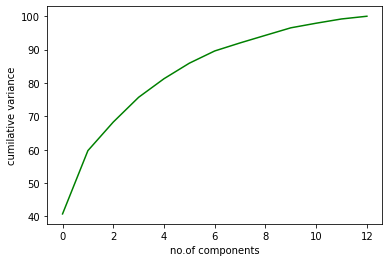

In [121]:
plt.plot(cum,color='green')
plt.xlabel('no.of components')
plt.ylabel('cumilative variance')
plt.show()

In [122]:
pca_values[:,0:7]

array([[-7.06335756e-01, -2.53192753e-01,  2.40926932e-02, ...,
        -2.65795809e-02, -7.43644860e-02,  6.51717951e-02],
       [-4.84976802e-01, -8.82289142e-03, -2.80482048e-01, ...,
        -2.38634447e-01, -7.18773018e-02,  6.85560138e-04],
       [-5.21172266e-01, -1.89187222e-01,  1.96216736e-01, ...,
         4.50448819e-02,  8.71163881e-02,  1.25605249e-01],
       ...,
       [ 6.26312888e-01, -5.46857013e-01, -3.04947552e-02, ...,
         7.37382032e-02,  3.17027708e-02,  1.86333922e-01],
       [ 5.72991102e-01, -4.25516087e-01, -9.45367174e-02, ...,
         1.50559179e-01,  1.12254009e-01,  1.48922360e-01],
       [ 7.01763997e-01, -5.13504983e-01,  2.93909961e-01, ...,
        -2.51381748e-02,  9.06167004e-02, -1.13451595e-01]])

In [123]:
wine_pca=pd.concat([pd.DataFrame(pca_values[:,0:7],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7']),wine[['Type']]],axis=1)
wine_pca

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Type
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,1
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,1
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,1
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,1
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,1
...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191,3
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014,3
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334,3
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922,3


# KMeans 

In [124]:
from sklearn.cluster import KMeans

In [125]:
wine_final

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Type,k_cluster
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,1,0
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,1,0
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,1,0
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,1,0
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,1,0
...,...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191,3,1
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014,3,1
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334,3,1
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922,3,1


# normalising data

In [126]:
norm_wine_pca=pd.DataFrame(MinMaxScaler().fit_transform(wine_final.iloc[:,0:7]))
norm_wine_pca

,0,1,2,3,4,5,6
0,0.073893,0.275583,0.512299,0.502523,0.349548,0.310425,0.396504
1,0.200316,0.447330,0.330847,0.557414,0.116366,0.313096,0.334028
2,0.179644,0.320567,0.614843,0.477067,0.428308,0.483814,0.455053
3,0.008038,0.045262,0.546267,0.501622,0.373492,0.478307,0.267078
4,0.361619,0.411737,0.676816,0.401465,0.495090,0.264871,0.388769
...,...,...,...,...,...,...,...
173,0.899650,0.121871,0.622674,0.622115,0.057938,0.300258,0.420743
174,0.809567,0.208694,0.547745,0.556825,0.434104,0.363113,0.379881
175,0.835000,0.069191,0.479778,0.640002,0.459860,0.424314,0.513889
176,0.804547,0.154472,0.441625,0.370492,0.544335,0.510806,0.477644


# elbow curve for finding n_clusters

C:\Users\Rohith Challam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


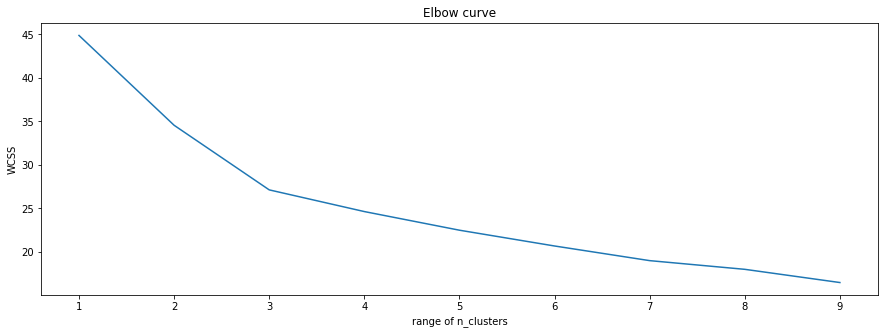

In [127]:
WCSS = []
for i in range(1,10):
    k_data=KMeans(n_clusters=i).fit(norm_wine_pca)
    WCSS.append(k_data.inertia_)
plt.figure(figsize=(15,5))
plt.plot(range(1,10),WCSS)
plt.title('Elbow curve')
plt.xlabel('range of n_clusters')
plt.ylabel('WCSS')
plt.show()

In [128]:
wine_kmeans=KMeans(n_clusters=3).fit(wine_data)
wine_kmeans

KMeans(n_clusters=3)

In [129]:
wine_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [130]:
wine_kmeans_labels=pd.Series(wine_kmeans.labels_)
wine_kmeans_labels

0      0
1      0
2      0
3      0
4      0
      ..
173    1
174    1
175    1
176    1
177    1
Length: 178, dtype: int32

In [131]:
wine_pca['k_cluster']=wine_kmeans_labels
wine_pca


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Type,k_cluster
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,1,0
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,1,0
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,1,0
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,1,0
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,1,0
...,...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191,3,1
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014,3,1
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334,3,1
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922,3,1


In [132]:
# cluster 0
wine_0=wine_pca[(wine_final.k_cluster==0)]
wine_0

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Type,k_cluster
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,1,0
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,1,0
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,1,0
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,1,0
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,1,0
5,-0.608190,-0.487519,-0.075433,-0.184152,-0.068730,0.027011,0.073993,1,0
6,-0.544047,-0.300196,-0.105075,-0.043006,-0.239967,-0.097480,-0.061164,1,0
7,-0.474357,-0.298197,-0.002821,-0.086235,-0.069381,-0.348479,-0.034282,1,0
8,-0.500432,-0.307603,-0.230494,-0.024397,-0.219723,0.059622,-0.044957,1,0
9,-0.627518,-0.206328,-0.114148,0.059695,-0.049682,0.089690,-0.185331,1,0


In [133]:
# cluster 1
wine_1=wine_pca[(wine_final.k_cluster==1)]
wine_1

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Type,k_cluster
60,0.411083,0.239042,-0.326348,-0.560152,-0.123190,-0.086008,0.139051,2,1
61,0.453466,0.115387,-0.339943,-0.263681,-0.036974,0.129082,0.014354,2,1
68,0.220158,0.026074,-0.272596,-0.439404,-0.068392,-0.121030,-0.006263,2,1
70,0.367943,0.155916,-0.306833,-0.056553,0.157212,-0.132278,0.158143,2,1
83,0.568567,-0.002725,0.241860,-0.126270,-0.235491,0.091910,0.093598,2,1
92,0.441539,0.280747,-0.077297,-0.311673,-0.111844,0.115988,0.020860,2,2
118,0.512738,0.171179,-0.153566,0.199957,-0.330551,0.039715,-0.019772,2,1
130,0.338878,-0.016305,-0.479280,0.167215,0.372324,-0.154083,0.051223,3,1
131,0.525473,-0.068518,-0.243308,0.286949,0.192455,-0.157959,-0.039231,3,1
132,0.610609,-0.038760,-0.215905,0.183355,0.303388,-0.115804,-0.163206,3,1


In [134]:
# cluster 2
wine_2=wine_pca[(wine_final.k_cluster==2)]
wine_2

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Type,k_cluster
43,-0.111517,-0.069316,0.190047,0.285777,-0.196972,-0.017014,0.068498,1,0
59,0.236612,0.415898,-0.835821,0.127361,-0.214333,0.022290,0.045558,2,2
62,-0.010291,0.144058,-0.389284,-0.068944,-0.118805,-0.127358,-0.157767,2,2
63,-0.453681,0.358591,-0.041591,0.113582,0.126027,0.253011,-0.154392,2,2
64,0.185889,0.431971,-0.120130,-0.300855,0.076686,-0.156993,0.082415,2,2
...,...,...,...,...,...,...,...,...,...
125,-0.058049,0.443301,0.164157,0.097332,-0.086569,0.104196,-0.155726,2,2
126,-0.056157,0.289123,0.173357,0.030636,0.053021,0.305097,-0.187588,2,2
127,0.318352,0.369040,0.457378,-0.343810,0.180049,0.042487,-0.014294,2,2
128,0.061689,0.430373,0.183273,-0.022905,0.090502,0.124831,-0.102099,2,2


# visualisation

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

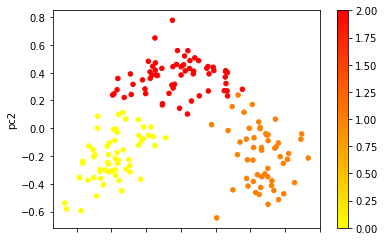

In [135]:
wine_pca.plot(x='pc1',y='pc2',c=wine_pca.k_cluster,kind='scatter',cmap=plt.cm.autumn_r)

#Hierarchical cluster

In [136]:
wine_pca_h = wine_pca.iloc[:,0:8]
wine_pca_h

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Type
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,1
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,1
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,1
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,1
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,1
...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191,3
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014,3
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334,3
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922,3


In [137]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

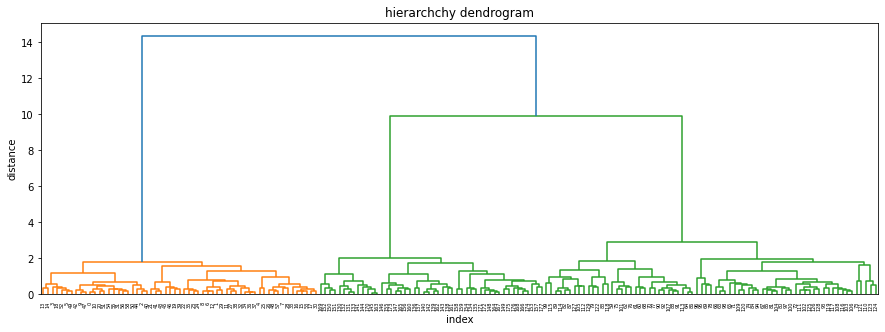

In [138]:
z=linkage(wine_pca_h,method='ward',metric='euclidean')
plt.figure(figsize=(15,5))
plt.title('hierarchchy dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
sch.dendrogram(z)
plt.show()

In [139]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward').fit(wine_pca_h)

In [140]:
cluster_labels_h=pd.Series(agg.labels_)
cluster_labels_h

0      1
1      1
2      1
3      1
4      1
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: int64

In [141]:
wine_pca_h['h_cluster']=cluster_labels_h
wine_pca_h

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Type,h_cluster
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,1,1
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,1,1
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,1,1
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,1,1
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,1,1
...,...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191,3,2
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014,3,2
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334,3,2
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922,3,2


In [143]:
wine_pca_h.iloc[:,0:7].groupby(wine_pca_h.h_cluster).mean()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
h_cluster,,,,,,,
0,-0.003512,0.339763,0.011729,-0.001897,0.013148,0.026253,0.011231
1,-0.486249,-0.214786,-0.009240,-0.026026,-0.044386,-0.042307,-0.000991
2,0.602876,-0.238558,-0.005991,0.034797,0.035110,0.013170,-0.015394


# visualisation 

In [ ]:
wine_pca_h.plot(x='pc1',y='pc3',c=wine_pca_h.cluster,kind='scatter',cmap=plt.cm.copper_r)